# diamonds

In [91]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
df = pd.read_csv('./diamonds-datamad0921/train.csv')

In [62]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


<AxesSubplot:xlabel='price', ylabel='Count'>

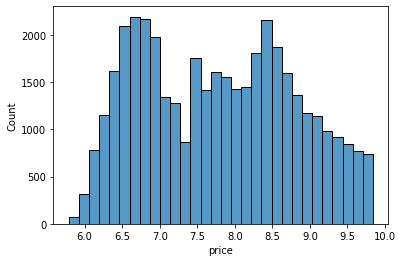

In [60]:
sns.histplot(df.price, bins=30)

In [6]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [64]:
df.cut.unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [66]:
cut_rank = {
    'Ideal' : 5,
    'Premium': 4, 
    'Very Good': 3, 
    'Good': 2, 
    'Fair': 1
}

In [67]:
df.cut = df.cut.map(cut_rank)


In [69]:
df.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [70]:
clarity_rank = {
    'IF': 8,
    'VVS2': 7,
    'VVS1': 6,
    'VS2' : 5,
    'VS1': 4, 
    'SI2': 3, 
    'SI1': 2, 
    'I1': 1
}

In [71]:
df.clarity = df.clarity.map(clarity_rank)


In [79]:
df.color.unique()

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [80]:
color_rank = {
    'D': 7,
    'E': 6,
    'F' : 5,
    'G': 4, 
    'H': 3, 
    'I': 2, 
    'J': 1
}

In [81]:
df.color = df.color.map(color_rank)


In [96]:
df.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,4,7,3,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,5,6,7,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,5,5,5,61.8,59.0,5.71,5.74,3.54,7.983


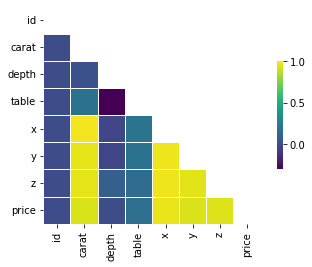

In [14]:

mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 


sns.heatmap(df.corr(), 
            mask=mask,
            cmap="viridis",
            vmax=1,
            square=True, 
            linewidth=.5, 
            cbar_kws={"shrink": .5} 

);

In [98]:
X = df.drop(['price'], axis=1)

y = df.price

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=141)

In [86]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [87]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [88]:
print("train RMSE: ",mse(y_train, y_train_pred) ** 0.5 )
print("test RMSE: ",mse(y_test, y_test_pred) ** 0.5)


train RMSE:  0.21625183894032493
test RMSE:  0.20744223633802455


In [90]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=30)
tree.fit(X_train, y_train)
mse(y_test, tree.predict(X_test)) ** 0.5


0.11843009123047009

In [92]:

%%time
rf = RandomForestRegressor(n_estimators=30, max_features=8, max_depth=10, min_samples_split=30)
rf.fit(X_train, y_train)

CPU times: user 5.05 s, sys: 0 ns, total: 5.05 s
Wall time: 5.52 s


RandomForestRegressor(max_depth=10, max_features=8, min_samples_split=30,
                      n_estimators=30)

In [93]:
mse(y_test, rf.predict(X_test)) ** 0.5


0.10607083568950992

In [94]:
df_test = pd.read_csv('./diamonds-datamad0921/test.csv')
df_sample = pd.read_csv('./diamonds-datamad0921/sample_submission.csv')

In [99]:
df_test.cut = df_test.cut.map(cut_rank)
df_test.clarity = df_test.clarity.map(clarity_rank)
df_test.color = df_test.color.map(color_rank)


In [100]:
X = df.drop(['price'], axis=1)
y = df.price

rf = RandomForestRegressor(n_estimators=30, max_features=8, max_depth=10, min_samples_split=30)
rf.fit(X, y)
y_pred = rf.predict(df_test)


In [101]:
price = pd.DataFrame(y_pred,columns=['price'])


In [102]:
submit= pd.DataFrame(df_test.id)
submit = submit.join( price)


In [103]:
submit

,id,price
0,0,6.156218
1,1,8.520215
2,2,9.447276
3,3,7.843086
4,4,8.917432
...,...,...
13480,13480,8.576857
13481,13481,8.373573
13482,13482,6.491357
13483,13483,8.718126


In [104]:
submit.to_csv("./submit.csv",index=False)